# Prediction

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
import random

In [3]:
df = pd.read_csv("processed.csv")
df.head()

,Player,Team,#,Nation,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,...,Position_RB,Position_GK,Position_RW,Position_AM,Position_FW,Position_LB,Position_CB,Position_LW,Position_LM,Position_RM
0,0,0,3,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,3,0,18,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,3,0,8,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,30,0,90,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
df.shape

(3349, 52)

In [4]:
y = df["Goals"]
X = df.drop(columns=["Goals"])

In [ ]:
numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Scale only the numeric columns
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_columns])

X_scaled_numeric_df = pd.DataFrame(X_scaled_numeric, columns=numeric_columns, index=X.index)

# Combine scaled numeric data with non-numeric data
X_scaled = pd.concat([X_scaled_numeric_df, X[non_numeric_columns]], axis=1)

X_scaled.describe()

,Player,Team,#,Nation,Minutes,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,...,Position_RB,Position_GK,Position_RW,Position_AM,Position_FW,Position_LB,Position_CB,Position_LW,Position_LM,Position_RM
count,3349.000000,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,...,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03
mean,0.000000,-1.357860e-16,5.622390e-17,-6.789301e-17,1.294210e-16,-3.288567e-17,-2.758153e-17,1.060828e-17,3.394650e-17,4.667644e-17,...,-1.697325e-17,-5.091975e-17,-5.091975e-17,-2.545988e-17,-4.667644e-17,-4.243313e-17,-4.243313e-18,-1.485159e-17,-2.545988e-17,1.060828e-17
std,1.000149,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-1.724062,-1.650974e+00,-1.300449e+00,-9.494908e-01,-2.043811e+00,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
25%,-0.852056,-7.785439e-01,-7.249618e-01,-9.494908e-01,-9.882373e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
50%,0.027600,-8.060011e-02,-1.494749e-01,-3.402603e-01,5.791294e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
75%,0.853712,7.918296e-01,5.904368e-01,6.751238e-01,8.030390e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,9.904265e-02,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
max,1.741017,1.664259e+00,5.769819e+00,2.705892e+00,8.030390e-01,1.101645e+01,1.490861e+01,1.323870e+01,5.720972e+00,7.488632e+00,...,3.205635e+00,3.753077e+00,3.136589e+00,3.425469e+00,2.595074e+00,3.205635e+00,2.253451e+00,3.039998e+00,4.088958e+00,4.233309e+00


# Train ML Model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
y_test.value_counts()

Goals
0    620
1     46
2      3
4      1
Name: count, dtype: int64

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))

# Feature selection based on importance
selector = SelectFromModel(rf, threshold=0.01).fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

RollingAvgGoals          0.397287
Shoot on Target          0.196582
Expected Goals (xG)      0.108990
Player                   0.018542
TeamPassAccuracy         0.016434
Age                      0.016146
#                        0.015463
Pass Completion %        0.014851
TeamxG                   0.013978
Shot-Creating Actions    0.011661
dtype: float64
Selected features: ['Player', '#', 'Shoot on Target', 'Expected Goals (xG)', 'Non-Penalty xG (npxG)', 'Shot-Creating Actions', 'Pass Completion %', 'Carries', 'Age', 'TeamxG', 'TeamPassAccuracy', 'RollingAvgGoals']


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train, y_train)

y_pred = rf_selected.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.04185537313432836


In [ ]:
# Evaluate baseline model
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred = rf_selected.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.041105223880597015
Mean Absolute Error: 0.055179104477611936


# Convert target to logscale

In [11]:
y = np.log1p(df["Goals"])  # Log transform to handle skewed distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42, criterion='absolute_error')
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_selected.predict(X_test_selected)

y_pred = np.expm1(y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.019643724827558898
Mean Absolute Error: 0.05924418841612798


# Inspect Results
Check to see if the model is simply taking advantage of the data imbalance (i.e., is it always predicting 0?)

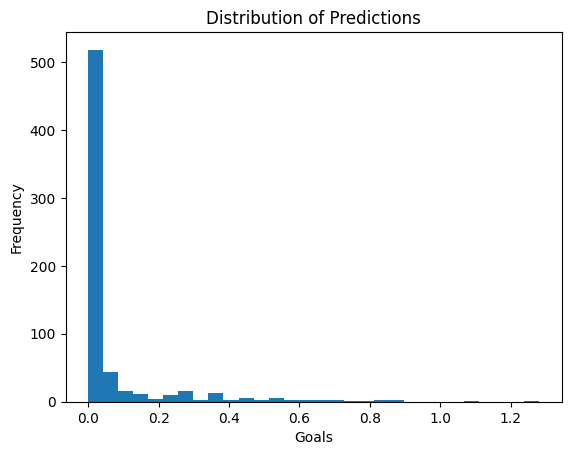

In [12]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=30)
plt.title('Distribution of Predictions')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

Confusion Matrix:
[[613   7   0   0]
 [ 33  13   0   0]
 [  0   3   0   0]
 [  0   1   0   0]]
Class-Level Accuracy: [0.98870968 0.2826087  0.         0.        ]


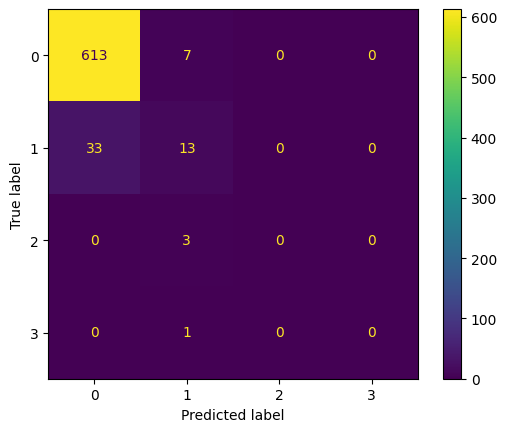

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Round predictions to nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Inverse transform y_test
y_test_original = np.expm1(y_test)  # Convert back to original scale

# Round predictions and true values for comparison
y_test_int = np.round(y_test_original).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_rounded)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='viridis')

# Print confusion matrix and class-level accuracy
print(f"Confusion Matrix:\n{conf_matrix}")
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy}")

In [15]:
# This is a flawed metric. The model can predict 0.1, for example, which would not be considered 0. 
print(f"Proportion of zeros in predictions: {sum(y_pred == 0) / len(y_pred)}")
print(f"Proportion of zeros in actuals: {sum(y_test == 0) / len(y_test)}")

Proportion of zeros in predictions: 0.3895522388059702
Proportion of zeros in actuals: 0.9253731343283582


### Strategy: Use weights based on class frequencies. Give more attention to less frequent classes

In [16]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train)
rf_selected.fit(X_train_selected, y_train, sample_weight=sample_weights)

RandomForestRegressor(criterion='absolute_error', random_state=42)

In [17]:
y_pred = rf_selected.predict(X_test_selected)
y_pred = np.expm1(y_pred)

Confusion Matrix:
[[606  14   0   0]
 [ 17  29   0   0]
 [  0   3   0   0]
 [  0   1   0   0]]
Class-Level Accuracy: [0.97741935 0.63043478 0.         0.        ]


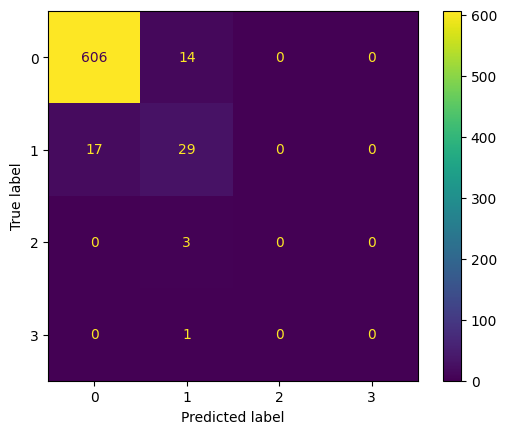

In [18]:
# Round predictions to nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Inverse transform y_test
y_test_original = np.expm1(y_test)  # Convert back to original scale

# Round predictions and true values for comparison
y_test_int = np.round(y_test_original).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_rounded)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='viridis')

# Print confusion matrix and class-level accuracy
print(f"Confusion Matrix:\n{conf_matrix}")
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy}")

# XGBoost

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Use the log-transformed target variable
y_log = np.log1p(df["Goals"])  # Log transform to handle skewed distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# Define an XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:absoluteerror',  
    n_estimators=100, 
    max_depth=6,  
    learning_rate=0.1,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse transform predictions back to original scale

# Evaluate the model
mse = mean_squared_error(np.expm1(y_test), y_pred)
mae = mean_absolute_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.05740296397474082
Mean Absolute Error: 0.07292074571478654
R2 Score: 0.4451771912785042


Confusion Matrix:
[[607  13   0   0]
 [ 23  23   0   0]
 [  0   3   0   0]
 [  0   1   0   0]]
Class-Level Accuracy: [0.97903226 0.5        0.         0.        ]


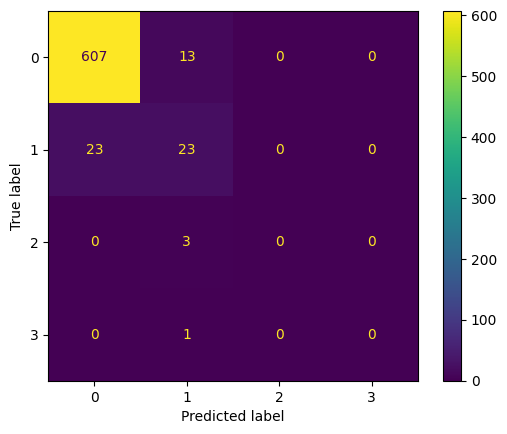

In [ ]:
# Round predictions for confusion matrix
y_pred_rounded = np.round(y_pred).astype(int)
y_test_rounded = np.round(np.expm1(y_test)).astype(int)

conf_matrix = confusion_matrix(y_test_rounded, y_pred_rounded)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='viridis')

print(f"Confusion Matrix:\n{conf_matrix}")
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy}")

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:absoluteerror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE as the evaluation metric
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


Mean Squared Error: 0.04052900397803365
Mean Absolute Error: 0.0711985351818337
R2 Score: 0.6082708232335866
Confusion Matrix:
[[611   9   0   0]
 [ 23  23   0   0]
 [  0   3   0   0]
 [  0   0   1   0]]
Class-Level Accuracy: [0.98548387 0.5        0.         0.        ]


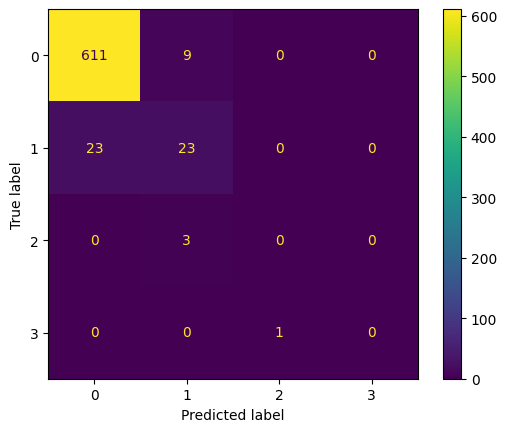

In [ ]:
# Train the model with the best parameters
xgb_best_model = xgb.XGBRegressor(**grid_search.best_params_)
xgb_best_model.fit(X_train, y_train)

# Make predictions
y_pred_log = xgb_best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse transform predictions back to original scale

mse = mean_squared_error(np.expm1(y_test), y_pred)
mae = mean_absolute_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

y_pred_rounded = np.round(y_pred).astype(int)
y_test_rounded = np.round(np.expm1(y_test)).astype(int)

conf_matrix = confusion_matrix(y_test_rounded, y_pred_rounded)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='viridis')

print(f"Confusion Matrix:\n{conf_matrix}")
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy}")

# Try a classifier for scored or not scored

In [33]:
# Train a classifier for zero vs. non-zero
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
y_train_binary = (y_train > 0).astype(int)
classifier.fit(X_train, y_train_binary)

# Predict probabilities for non-zero class
y_pred_binary = classifier.predict(X_test)

Accuracy: 0.9493
Precision: 0.7353
Recall: 0.5000
F1 Score: 0.5952
Confusion Matrix:
[[611   9]
 [ 25  25]]

Classification Report:

              precision    recall  f1-score   support

0 (No Goals)       0.96      0.99      0.97       620
  1+ (Goals)       0.74      0.50      0.60        50

    accuracy                           0.95       670
   macro avg       0.85      0.74      0.78       670
weighted avg       0.94      0.95      0.94       670



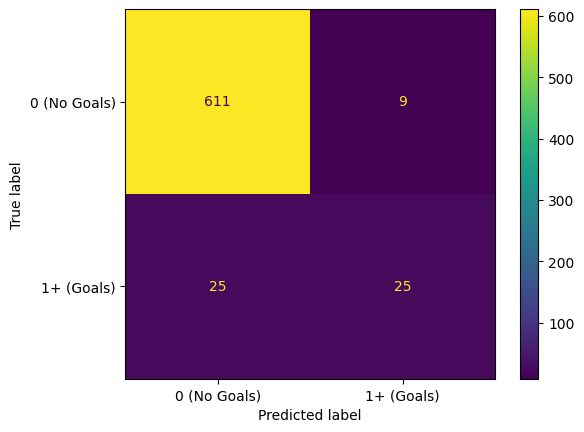

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate binary predictions
accuracy = accuracy_score((y_test > 0).astype(int), y_pred_binary)
precision = precision_score((y_test > 0).astype(int), y_pred_binary)
recall = recall_score((y_test > 0).astype(int), y_pred_binary)
f1 = f1_score((y_test > 0).astype(int), y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix((y_test > 0).astype(int), y_pred_binary)
ConfusionMatrixDisplay(conf_matrix, display_labels=["0 (No Goals)", "1+ (Goals)"]).plot(cmap='viridis')
print(f"Confusion Matrix:\n{conf_matrix}")

print("\nClassification Report:\n")
print(classification_report((y_test > 0).astype(int), y_pred_binary, target_names=["0 (No Goals)", "1+ (Goals)"]))

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_binary_resampled = smote.fit_resample(X_train, y_train_binary)
classifier.fit(X_train_resampled, y_train_binary_resampled)

RandomForestClassifier(random_state=42)

Accuracy: 0.9597
Precision: 0.6885
Recall: 0.8400
F1 Score: 0.7568
Confusion Matrix:
[[601  19]
 [  8  42]]

Classification Report:

              precision    recall  f1-score   support

0 (No Goals)       0.99      0.97      0.98       620
  1+ (Goals)       0.69      0.84      0.76        50

    accuracy                           0.96       670
   macro avg       0.84      0.90      0.87       670
weighted avg       0.96      0.96      0.96       670



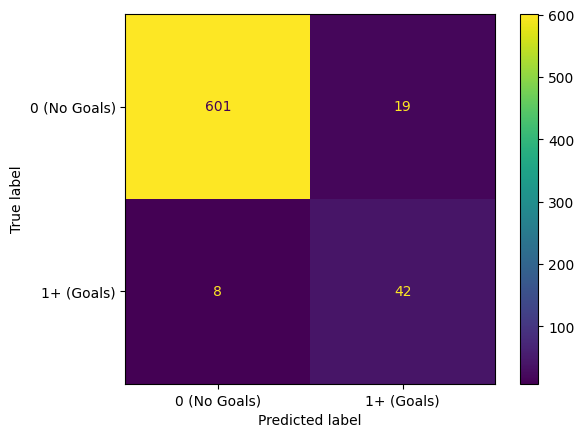

In [ ]:
# Predict binary outcomes on the test set
y_pred_binary_resampled = classifier.predict(X_test)

# Evaluate the resampled classifier
accuracy_resampled = accuracy_score((y_test > 0).astype(int), y_pred_binary_resampled)
precision_resampled = precision_score((y_test > 0).astype(int), y_pred_binary_resampled)
recall_resampled = recall_score((y_test > 0).astype(int), y_pred_binary_resampled)
f1_resampled = f1_score((y_test > 0).astype(int), y_pred_binary_resampled)

print(f"Accuracy: {accuracy_resampled:.4f}")
print(f"Precision: {precision_resampled:.4f}")
print(f"Recall: {recall_resampled:.4f}")
print(f"F1 Score: {f1_resampled:.4f}")

conf_matrix_resampled = confusion_matrix((y_test > 0).astype(int), y_pred_binary_resampled)
ConfusionMatrixDisplay(conf_matrix_resampled, display_labels=["0 (No Goals)", "1+ (Goals)"]).plot(cmap='viridis')
print(f"Confusion Matrix:\n{conf_matrix_resampled}")

print("\nClassification Report:\n")
print(classification_report((y_test > 0).astype(int), y_pred_binary_resampled, target_names=["0 (No Goals)", "1+ (Goals)"]))

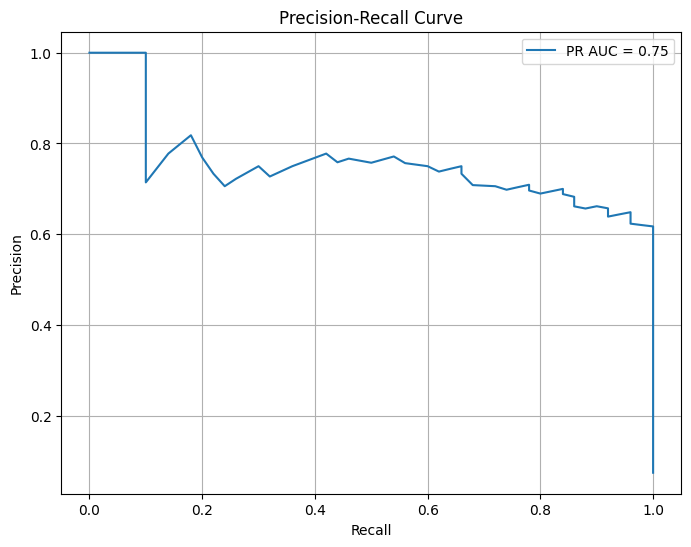

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (1+ Goals)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Probabilities for "1+ (Goals)"

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve((y_test > 0).astype(int), y_pred_proba)

pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [39]:
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]
print(f"Best threshold for F1 score: {best_threshold}")

Best threshold for F1 score: 0.33


In [ ]:
# Update predictions using the best threshold
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the adjusted predictions
accuracy = accuracy_score((y_test > 0).astype(int), y_pred_adjusted)
precision = precision_score((y_test > 0).astype(int), y_pred_adjusted)
recall = recall_score((y_test > 0).astype(int), y_pred_adjusted)
f1 = f1_score((y_test > 0).astype(int), y_pred_adjusted)

print(f"Adjusted Threshold (0.33) Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Adjusted Threshold (0.33) Evaluation:
Accuracy: 0.9582
Precision: 0.6486
Recall: 0.9600
F1 Score: 0.7742


Confusion Matrix (Adjusted Threshold):
[[594  26]
 [  2  48]]
Class-Level Accuracy: [0.95806452 0.96      ]


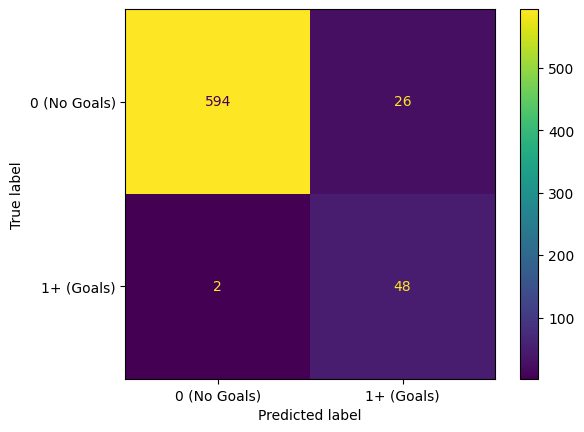

In [ ]:
conf_matrix_adjusted = confusion_matrix((y_test > 0).astype(int), y_pred_adjusted)

ConfusionMatrixDisplay(conf_matrix_adjusted, display_labels=["0 (No Goals)", "1+ (Goals)"]).plot(cmap='viridis')
print(f"Confusion Matrix (Adjusted Threshold):\n{conf_matrix_adjusted}")

class_accuracy_adjusted = conf_matrix_adjusted.diagonal() / conf_matrix_adjusted.sum(axis=1)
print(f"Class-Level Accuracy: {class_accuracy_adjusted}")

                   Feature  Importance
37         RollingAvgGoals    0.272268
9          Shoot on Target    0.215794
16     Expected Goals (xG)    0.165570
17   Non-Penalty xG (npxG)    0.074137
8              Total Shoot    0.061920
26     Progressive Carries    0.012186
45             Position_FW    0.011418
19   Shot-Creating Actions    0.010805
32                  TeamxG    0.010516
18  Expected Assists (xAG)    0.009963
27        Dribble Attempts    0.009063
28     Successful Dribbles    0.007386
6    Penalty Shoot on Goal    0.007308
7            Penalty Shoot    0.006739
4                  Minutes    0.006612
29                    Date    0.006304
2                        #    0.006053
0                   Player    0.005967
15                  Blocks    0.005837
24      Progressive Passes    0.005444
31               TeamShots    0.005419
3                   Nation    0.005416
36      DaysSinceLastMatch    0.005296
23       Pass Completion %    0.005182
34            TeamDribble

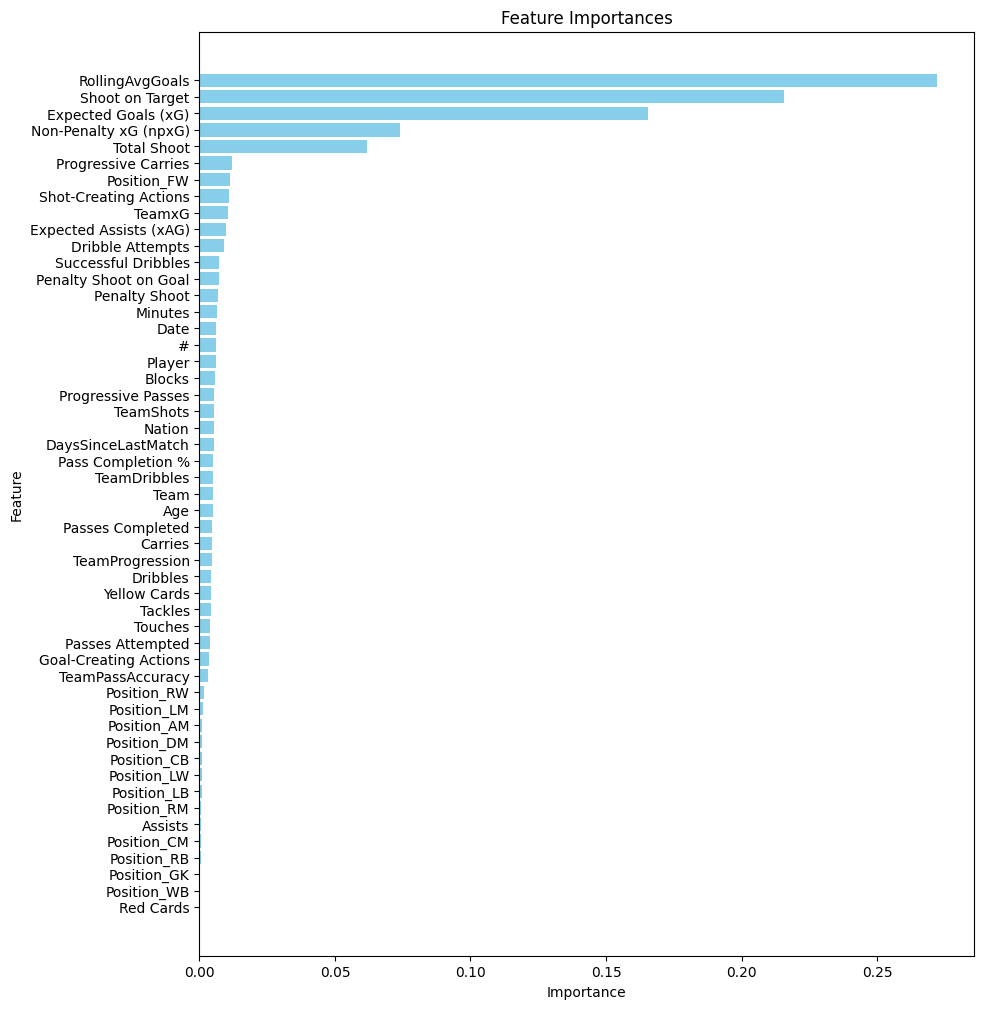

In [ ]:
# Get feature importances
feature_importances = classifier.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

plt.figure(figsize=(10, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

---

# Premier League Goal-scoring Prediction Demo

### Test predictions on players who **did** score

In [182]:
# Select a player who scored (actual goals >= 1) from the test set
positive_goal_indices = y_test[y_test >= np.log1p(1)].index  # Use log(1+1) to match the log scale
random_index = random.choice(positive_goal_indices)
player_stats = X_test.loc[random_index]
actual_goals_log = y_test.loc[random_index]

# Convert log-transformed goals back to actual goals
actual_goals = np.expm1(actual_goals_log)  # Inverse 

# Ensure the input for prediction is a DataFrame with feature names
player_stats_df = pd.DataFrame([player_stats], columns=X_test.columns)

# Model predictions
predicted_proba = classifier.predict_proba(player_stats_df)[:, 1]
predicted_class = (predicted_proba >= 0.33).astype(int)

print("Player Stats:")
print(player_stats)
print(f"\nActual Goals (Log-Scaled): {actual_goals_log}")
print(f"Actual Goals (Inverse Transformed): {actual_goals}")
print(f"Predicted Probability of Scoring: {predicted_proba[0]:.2f}")
print(f"Predicted Class: {'1+ Goals' if predicted_class else '0 Goals'}")

if predicted_class:
    print("\nThe model correctly predicted that this player would score at least 1 goal.")
else:
    print("\nThe model incorrectly predicted that this player would not score any goals.")

Player Stats:
Player                    0.662482
Team                     -1.302002
#                        -0.971599
Nation                   -0.949491
Minutes                   0.803039
Assists                  -0.259250
Penalty Shoot on Goal    -0.067075
Penalty Shoot            -0.075536
Total Shoot               0.099043
Shoot on Target           1.116826
Yellow Cards              2.182912
Red Cards                -0.071429
Touches                   0.617269
Dribbles                 -0.126267
Tackles                  -0.622356
Blocks                    0.228967
Expected Goals (xG)      -0.450091
Non-Penalty xG (npxG)    -0.455783
Expected Assists (xAG)   -0.431924
Shot-Creating Actions    -0.847667
Goal-Creating Actions    -0.363300
Passes Completed          0.573243
Passes Attempted          0.430043
Pass Completion %         0.808451
Progressive Passes       -0.893448
Carries                   0.228672
Progressive Carries      -0.698084
Dribble Attempts         -0.690721
Succes

### Test predictions on players who **did not** score

In [200]:
# Select a player who did not score (actual goals = 0) from the test set
zero_goal_indices = y_test[y_test == np.log1p(0)].index  # Use log(1+0) to match the log scale
random_index = random.choice(zero_goal_indices)
player_stats = X_test.loc[random_index]
actual_goals_log = y_test.loc[random_index]

# Convert log-transformed goals back to actual goals
actual_goals = np.expm1(actual_goals_log)  # Inverse 

player_stats_df = pd.DataFrame([player_stats], columns=X_test.columns)

# Model predictions
predicted_proba = classifier.predict_proba(player_stats_df)[:, 1]
predicted_class = (predicted_proba >= 0.33).astype(int)

print("Player Stats:")
print(player_stats)
print(f"\nActual Goals (Log-Scaled): {actual_goals_log}")
print(f"Actual Goals (Inverse Transformed): {actual_goals}")
print(f"Predicted Probability of Scoring: {predicted_proba[0]:.2f}")
print(f"Predicted Class: {'1+ Goals' if predicted_class else '0 Goals'}")

if not predicted_class:
    print("\nThe model correctly predicted that this player would not score any goals.")
else:
    print("\nThe model incorrectly predicted that this player would score at least 1 goal.")

Player Stats:
Player                   -1.089180
Team                      1.140802
#                         0.261587
Nation                   -0.949491
Minutes                   0.803039
Assists                  -0.259250
Penalty Shoot on Goal    -0.067075
Penalty Shoot            -0.075536
Total Shoot               2.508441
Shoot on Target           1.116826
Yellow Cards             -0.443012
Red Cards                -0.071429
Touches                   0.300446
Dribbles                 -0.126267
Tackles                  -0.622356
Blocks                    0.228967
Expected Goals (xG)       0.491123
Non-Penalty xG (npxG)     0.544491
Expected Assists (xAG)   -0.431924
Shot-Creating Actions     0.232149
Goal-Creating Actions    -0.363300
Passes Completed         -0.149824
Passes Attempted          0.083900
Pass Completion %        -0.644343
Progressive Passes        1.272167
Carries                   0.352511
Progressive Carries       1.541804
Dribble Attempts          1.595639
Succes